In [1]:
#Based on examples from:
#   http://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_twoclass.html
#   https://betatim.github.io/posts/sklearn-for-TMVA-users/
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;

from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles
from sklearn.metrics import roc_curve, classification_report, roc_auc_score, auc

import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

# Construct training dataset
X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=300, n_features=2,
                                 n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

# Construct testing dataset
X1t, y1t = make_gaussian_quantiles(cov=2.,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=2)
X2t, y2t = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=300, n_features=2,
                                 n_classes=2, random_state=2)
Xt = np.concatenate((X1t, X2t))
yt = np.concatenate((y1t, - y2t + 1))




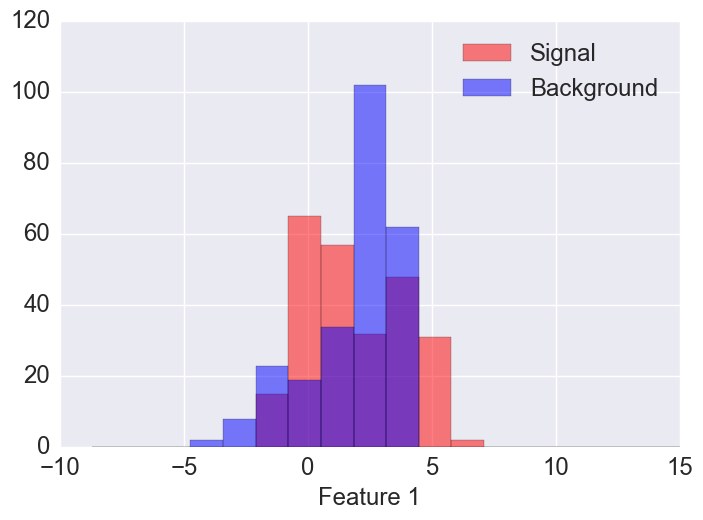

In [2]:

bins = np.linspace(-10, 15, 20)
plt.hist(X[y==0,0], bins=bins, label='Signal', alpha=0.5, color='red')
plt.hist(X[y==1,0], bins=bins, label='Background', alpha=0.5, color='blue')
plt.xlabel('Feature 1')
plt.legend()

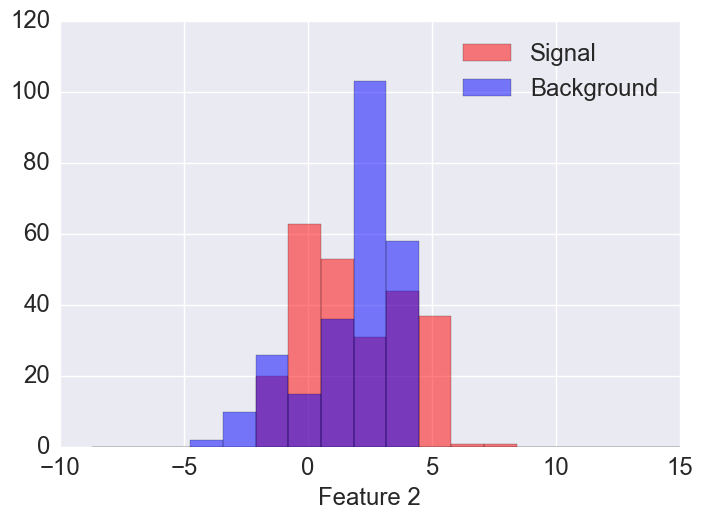

In [3]:
plt.hist(X[y==0,1], bins=bins, label='Signal', alpha=0.5, color='red')
plt.hist(X[y==1,1], bins=bins, label='Background', alpha=0.5, color='blue')
plt.xlabel('Feature 2')
plt.legend()

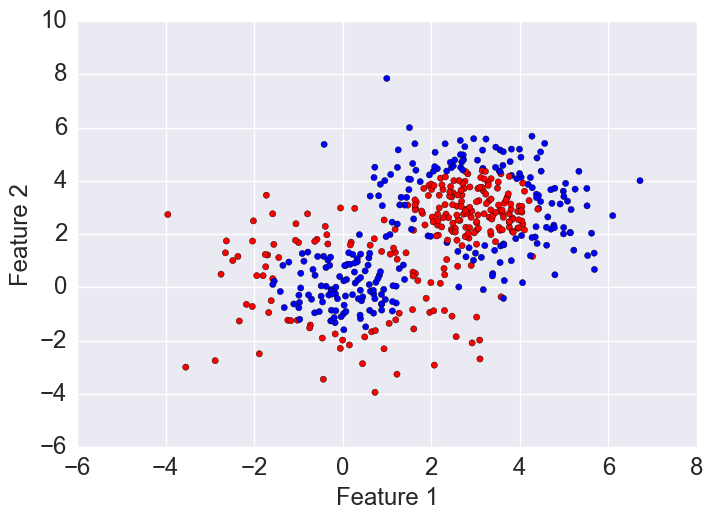

In [4]:
fig, ax = plt.subplots()
cols=[('blue' if y[i]==0 else 'red') for i in range(len(y))]
plt.scatter(X[:, 0], X[:, 1],  c=cols)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

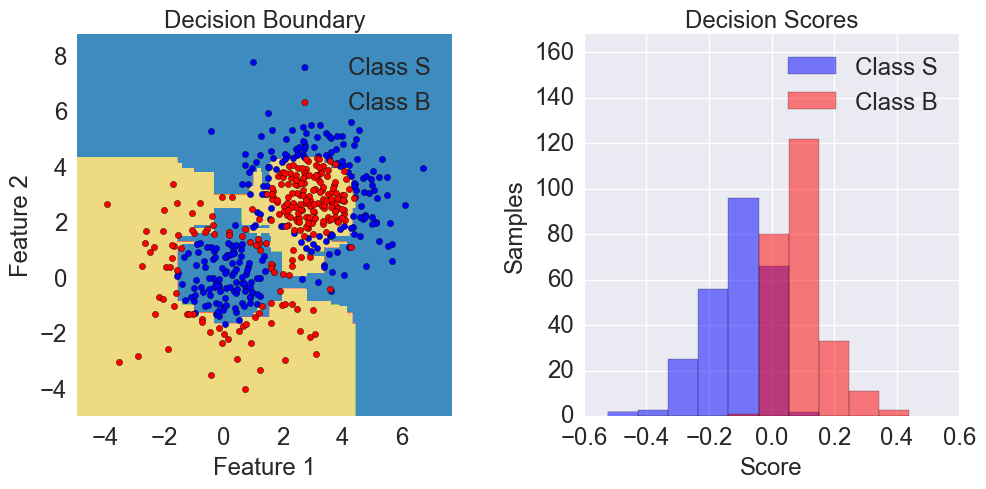

In [5]:

# Create and fit an AdaBoosted decision tree
clf=DecisionTreeClassifier(max_depth=1)
bdt = AdaBoostClassifier(clf,
                         algorithm="SAMME",
                         n_estimators=500)

bdt.fit(X, y)

plot_colors = "br"
plot_step = 0.02
class_names = "SB"

plt.figure(figsize=(10, 5))

# Plot the decision boundaries
plt.subplot(121)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=plt.cm.Paired,
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')

# Plot the two-class decision scores
twoclass_output = bdt.decision_function(X)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[y == i],
             bins=10,
             range=plot_range,
             facecolor=c,
             label='Class %s' % n,
             alpha=.5)
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()

In [6]:
y_predicted = bdt.predict(Xt)
print(classification_report(yt, y_predicted,
                            target_names=["Background", "Signal"]))

             precision    recall  f1-score   support

 Background       0.88      0.76      0.82       250
     Signal       0.79      0.90      0.84       250

avg / total       0.83      0.83      0.83       500



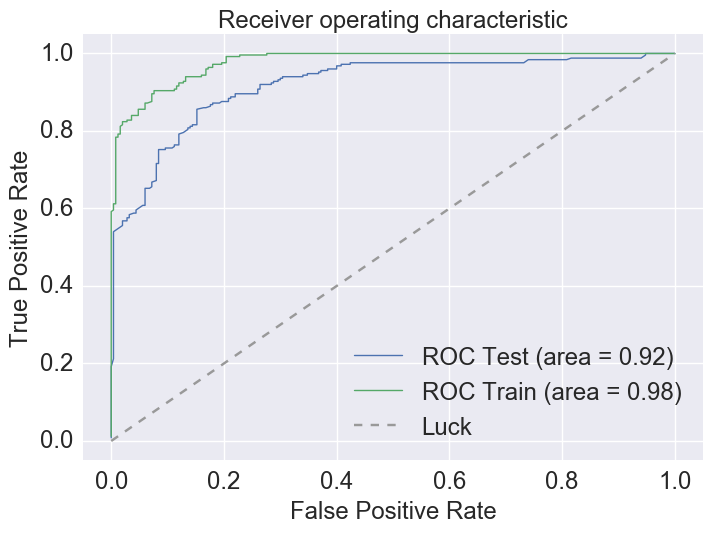

In [7]:
#Get ROC for test sample
decisions = bdt.decision_function(Xt)
fpr, tpr, thresholds = roc_curve(yt, decisions)
roc_auc = auc(fpr, tpr)

#Get ROC for training sample
decisionsb = bdt.decision_function(X)
fprb, tprb, thresholdsb = roc_curve(y, decisionsb)
roc_aucb = auc(fprb, tprb)

plt.plot(fpr, tpr, lw=1, label='ROC Test (area = %0.2f)'%(roc_auc))
plt.plot(fprb, tprb, lw=1, label='ROC Train (area = %0.2f)'%(roc_aucb))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.grid()
plt.show()